In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('C:\\Users\\Asus\\Desktop\\DATASETS\\train.csv')

In [3]:
data.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate
279945,279945,399440,399441,"Is there any best anti-dragon, anti-hogs and a...",Could anyone give me suggestions to improve th...,0
109852,109852,180217,180218,Why did Motorola split up into two companies?,I created the app and leaving my job to work o...,0
340609,340609,468365,468366,What does the Fox say?,What noise does a fox make?,0
50367,50367,89490,89491,Can Japan still be a superpower country?,Can India become a electronic superpower and h...,0
369938,369938,317453,500425,How do I track my phone with GPS?,How do I track GPS in mobile phone?,0


In [4]:
data.shape

(404290, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [6]:
data.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [7]:
data.dropna(inplace=True)

In [8]:
data.duplicated().sum()

0

<AxesSubplot:ylabel='is_duplicate'>

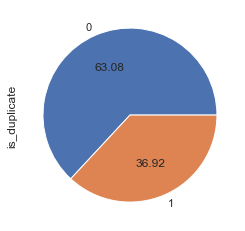

In [9]:
data['is_duplicate'].value_counts().plot(kind='pie',autopct='%0.2f')

In [10]:
# Repeated question
qid = pd.Series(data['qid1'].tolist()+data['qid2'].tolist())
print('Number of unique question',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of question getting repeated',x[x].shape[0])

Number of unique question 537929
Number of question getting repeated 111778


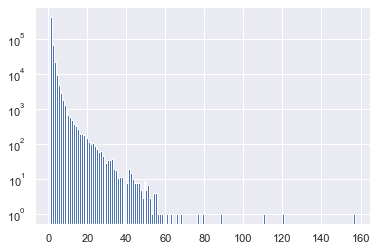

In [11]:
# Repeated question histogram
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [12]:
# taking sample dataset because dataset is big

In [13]:
df = data.sample(30000,random_state=0)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 187266 to 194843
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            30000 non-null  int64 
 1   qid1          30000 non-null  int64 
 2   qid2          30000 non-null  int64 
 3   question1     30000 non-null  object
 4   question2     30000 non-null  object
 5   is_duplicate  30000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.6+ MB


<AxesSubplot:ylabel='is_duplicate'>

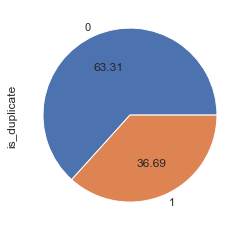

In [15]:
df['is_duplicate'].value_counts().plot(kind='pie',autopct='%0.2f')

In [16]:
# Repeated question
qid = pd.Series(df['qid1'].tolist()+df['qid2'].tolist())
print('Number of unique question',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of question getting repeated',x[x].shape[0])

Number of unique question 55421
Number of question getting repeated 3434


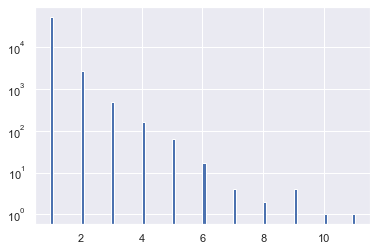

In [17]:
# Repeated question histogram
plt.hist(qid.value_counts().values,bins=100)
plt.yscale('log')
plt.show()

In [18]:
# adding more features in dataset

In [19]:
df['q1_num_words'] =  df['question1'].apply(lambda x: len(x.split(" ")))
df['q2_num_words'] =  df['question2'].apply(lambda x: len(x.split(" ")))
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_num_words,q2_num_words
187266,187266,285431,41214,What are some differences between German and A...,What are the cultural differences between Aust...,1,9,9
6557,6557,12839,12840,What are the best Doctor Doom stories?,What are the best comics featuring Doctor Doom?,1,7,8
139265,139265,27229,65241,What are the best books to prepare for SSB?,What are the best books to prepare for the IIT...,0,9,13
240137,240137,351894,351895,Is an MS in VLSI from Portland State Universit...,Which universities should I apply for an MS in...,0,24,10
3336,3336,6613,6614,Height: How would a 14 year old increase his h...,How should I increase my height?,1,10,6


In [20]:
# common words
def common_words(row):
    w1 = set(map(lambda x: x.lower().strip() , row['question1'].split(" ")))
    w2 = set(map(lambda x: x.lower().strip() , row['question2'].split(" ")))
    return len(w1&w2)

In [21]:
df['common_words']=df.apply(common_words,axis=1)

In [22]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_num_words,q2_num_words,common_words
187266,187266,285431,41214,What are some differences between German and A...,What are the cultural differences between Aust...,1,9,9,5
6557,6557,12839,12840,What are the best Doctor Doom stories?,What are the best comics featuring Doctor Doom?,1,7,8,5
139265,139265,27229,65241,What are the best books to prepare for SSB?,What are the best books to prepare for the IIT...,0,9,13,8
240137,240137,351894,351895,Is an MS in VLSI from Portland State Universit...,Which universities should I apply for an MS in...,0,24,10,4
3336,3336,6613,6614,Height: How would a 14 year old increase his h...,How should I increase my height?,1,10,6,3


In [23]:
# Total Words
def total_words(row):
    w1 = set(map(lambda x: x.lower().strip() , row['question1'].split(" ")))
    w2 = set(map(lambda x: x.lower().strip() , row['question2'].split(" ")))
    return (len(w1)+len(w2))

In [24]:
df['total_words']=df.apply(total_words,axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_num_words,q2_num_words,common_words,total_words
187266,187266,285431,41214,What are some differences between German and A...,What are the cultural differences between Aust...,1,9,9,5,18
6557,6557,12839,12840,What are the best Doctor Doom stories?,What are the best comics featuring Doctor Doom?,1,7,8,5,15
139265,139265,27229,65241,What are the best books to prepare for SSB?,What are the best books to prepare for the IIT...,0,9,13,8,21
240137,240137,351894,351895,Is an MS in VLSI from Portland State Universit...,Which universities should I apply for an MS in...,0,24,10,4,33
3336,3336,6613,6614,Height: How would a 14 year old increase his h...,How should I increase my height?,1,10,6,3,16


In [25]:
df['q1_len'] = df['question1'].str.len()
df['q2_len'] = df['question2'].str.len()
df.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate,q1_num_words,q2_num_words,common_words,total_words,q1_len,q2_len
360747,360747,490546,490547,"How can I download books from ""textbooknova""?",How can I download a book from Issuu.com?,0,7,8,5,15,45,41
266619,266619,22233,68325,Why do some people think Hillary Clinton is a ...,Why do some people believe that Hillary Clinto...,1,11,11,9,22,58,58
280064,280064,22711,68749,What are the best books for SSC CGL preparation?,Which are the best books for SSC CGL?,1,9,8,6,17,48,37
231675,231675,52318,678,How do I quit smoking?,How did you quit/stop smoking?,1,5,5,2,10,22,30
402771,402771,4051,37921,What can I do to practice my English?,How can I become good at English?,1,8,7,3,15,37,33


In [26]:
df['word_share']=round(df['common_words']/df['total_words'],2)
df.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate,q1_num_words,q2_num_words,common_words,total_words,q1_len,q2_len,word_share
6075,6075,11913,11914,What is Artificial Intelligence?,What all does Artificial Intelligence include?,0,4,6,2,10,32,46,0.20
256767,256767,371957,371958,Who is the best player NOT in the Baseball Hal...,Who are the best players in the Baseball Hall ...,1,12,13,7,23,56,62,0.30
235502,235502,23601,9406,What are some of the best ways to lose 20 poun...,What are some ways to lose 20 pounds in 3 weeks?,1,14,11,11,25,60,48,0.44
98477,98477,163630,163631,Is it legal for a campaign to work together co...,Is it legal for a candidate for President to s...,0,23,17,6,37,143,93,0.16
102439,102439,6749,20542,How can improve my English speaking?,How can I improve fluency in English?,1,6,7,3,13,36,37,0.23


In [27]:
# Analysis od features

miminum characters 1
maximum characters 1151
average number of character 59


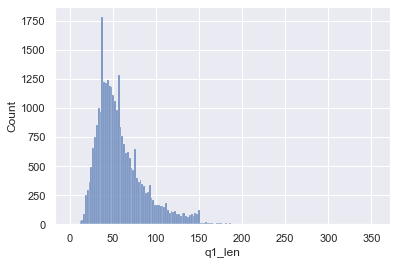

In [28]:
sns.histplot(df['q1_len'])
print('miminum characters',df['q1_len'].min())
print('maximum characters',df['q2_len'].max())
print('average number of character',int(df['q1_len'].mean()))

miminum characters 2
maximum characters 1151
average number of character 60


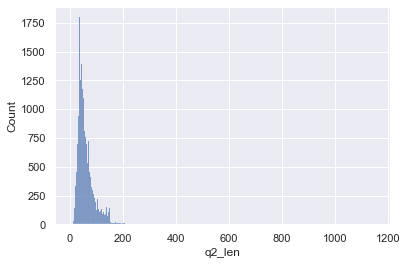

In [29]:
sns.histplot(df['q2_len'])
print('miminum characters',df['q2_len'].min())
print('maximum characters',df['q2_len'].max())
print('average number of character',int(df['q2_len'].mean()))

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


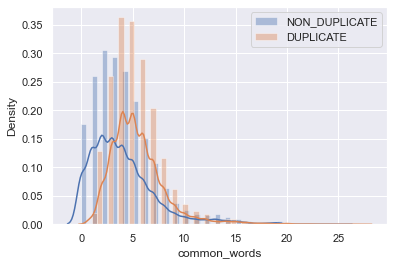

In [30]:
# common words
sns.distplot(df[df['is_duplicate']==0]['common_words'],label='NON_DUPLICATE')
sns.distplot(df[df['is_duplicate']==1]['common_words'],label='DUPLICATE')
plt.legend()
plt.show()

# we can see if words in question1 and question2 are less than 4 , there is high probability that it will be "NON DUPLICATE"
# or if it more than 4 , there is high probability it will be"Duplicate"

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


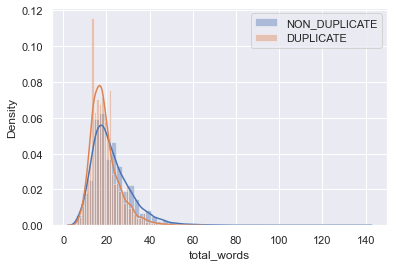

In [31]:
# total words
sns.distplot(df[df['is_duplicate']==0]['total_words'],label='NON_DUPLICATE')
sns.distplot(df[df['is_duplicate']==1]['total_words'],label='DUPLICATE')
plt.legend()
plt.show()

# if total_word is in range 0-25 their is high chance it will be duplicate or if total words are more than 25 their is high chance it will be non_duplicate

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


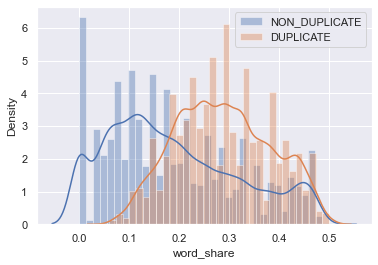

In [32]:
# words_
sns.distplot(df[df['is_duplicate']==0]['word_share'],label='NON_DUPLICATE')
sns.distplot(df[df['is_duplicate']==1]['word_share'],label='DUPLICATE')
plt.legend()
plt.show()

# we can see if word_share in question1 and question2 are less than 0.2 , there is high probability that it will be "NON DUPLICATE"
# or if it more than 0.2 , there is high probability it will be"Duplicate"

# Text Preprocessing
## 1. Lowercase
## 2. Tokenization
## 3. Removing special characters
## 4. Removing stop words and punctuations
## 5. Stemming

In [33]:
# make a function for all 5 steps
import nltk
from nltk.corpus import stopwords
stopwords.words('english')
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
import string

In [34]:
def text_transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
# removing special characters    
    x = []
    for i in text:
        if i.isalnum():
            x.append(i)
            
    text = x[:]
    x.clear()
    
    for i in text:
        if i not in stopwords.words('english') and string.punctuation:
            x.append(i)
    
    text = x[:]
    x.clear()
    
    for i in text:
        x.append(ps.stem(i))
        
        
        
    return " ".join(x)

In [35]:
df['question1'] = df['question1'].apply(text_transform)
df['question2'] = df['question2'].apply(text_transform)

In [36]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_num_words,q2_num_words,common_words,total_words,q1_len,q2_len,word_share
187266,187266,285431,41214,differ german austrian cultur,cultur differ austria germani,1,9,9,5,18,62,62,0.28
6557,6557,12839,12840,best doctor doom stori,best comic featur doctor doom,1,7,8,5,15,38,47,0.33
139265,139265,27229,65241,best book prepar ssb,best book prepar iit jam physic exam,0,9,13,8,21,43,64,0.38
240137,240137,351894,351895,ms vlsi portland state univers good heard inte...,univers appli ms vlsi,0,24,10,4,33,123,52,0.12
3336,3336,6613,6614,height would 14 year old increas height,increas height,1,10,6,3,16,52,32,0.19


In [37]:
ques_df = df[['question1','question2']]

In [38]:
# merge text
questions = list(ques_df['question1']) + list(ques_df['question2'])

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
q1_arr,q2_arr = np.vsplit(tfidf.fit_transform(questions).toarray(),2)

In [40]:
temp_df1 = pd.DataFrame(q1_arr, index = ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index = ques_df.index)
temp_df = pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(30000, 6000)

In [41]:
final_df = pd.concat([df,temp_df],axis=1)
final_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_num_words,q2_num_words,common_words,total_words,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
187266,187266,285431,41214,differ german austrian cultur,cultur differ austria germani,1,9,9,5,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6557,6557,12839,12840,best doctor doom stori,best comic featur doctor doom,1,7,8,5,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
139265,139265,27229,65241,best book prepar ssb,best book prepar iit jam physic exam,0,9,13,8,21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
240137,240137,351894,351895,ms vlsi portland state univers good heard inte...,univers appli ms vlsi,0,24,10,4,33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3336,3336,6613,6614,height would 14 year old increas height,increas height,1,10,6,3,16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
 data2=final_df.copy()

In [43]:
new_df = final_df.drop(['id','qid1','qid2','question1','question2'],axis=1)

In [44]:
new_df.head()

,is_duplicate,q1_num_words,q2_num_words,common_words,total_words,q1_len,q2_len,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
187266,1,9,9,5,18,62,62,0.28,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6557,1,7,8,5,15,38,47,0.33,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
139265,0,9,13,8,21,43,64,0.38,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
240137,0,24,10,4,33,123,52,0.12,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3336,1,10,6,3,16,52,32,0.19,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [46]:
x = new_df.drop(['is_duplicate'],axis=1)
y = new_df['is_duplicate']

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [48]:
# RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
print('accuracy_score', accuracy_score(y_test,y_pred))

accuracy_score 0.765


In [49]:
# Extratreeclassifier
etc =ExtraTreesClassifier()
etc.fit(x_train,y_train)
y_pred = etc.predict(x_test)
print('accuracy_score', accuracy_score(y_test,y_pred))

accuracy_score 0.7731666666666667


In [50]:
# logistic regeression
lr = LogisticRegression ()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print('accuracy_score', accuracy_score(y_test,y_pred))

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy_score 0.7238333333333333


In [58]:
mnb = MultinomialNB()

In [59]:
# MultinomialNB
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))

0.7401666666666666
